<a href="https://colab.research.google.com/github/Vputri/Teknik-Kompilasi/blob/main/Teknik_Kompilasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Program Finite Automata**

# **1. String Bilangan Genap**
L(G1) = { 2, 4, 6, 8, 10, 12,..,18, 20, ..., 98, 100, 102,....., 998, 1000, 1002,...}

In [ ]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal 1002 20
inputan = list(inputan.split(' '))
hasil = []

for i in inputan:
  if int(i)%2 == 0:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : 1002 102 2
ACCEPTED


# **2. String Bilangan String Ganjil**
L(G2) = { 1, 3, 5, 7, 9, 111,..,17, 19, ..., 97, 99, 101,....., 997, 999, 1001,... }

In [ ]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal 99 101
inputan = list(inputan.split(' '))
hasil = []

for i in inputan:
  if int(i)%2 == 1:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : 1001 101 11 1
ACCEPTED


# **3. String Nama-Nama Mahasiswa Kelas 3IA88**
L(G3) = {ARDI, BILI, BILAL, CICI, DATUL, DIYANK, FARELL, FATONI, FATTAH, GIO, KHALIF, LUTHFI, MAUL, NARIS, RIFQY, REKSA, RAY, SISY, VIKA, YAZID,
ZIDAN }

In [ ]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal cici sisy
inputan = list(inputan.split(' '))
kamus = ['ARDI', 'BILI', 'BILAL', 'CICI', 'DATUL', 'DIYANK', 'FARELL', 'FATONI', 'FATTAH', 'GIO', 
         'KHALIF', 'LUTHFI', 'MAUL', 'NARIS', 'RIFQY', 'REKSA', 'RAY', 'SISY', 'VIKA', 'YAZID', 'ZIDAN']
hasil = []

for i in inputan:
  if i.upper() in kamus:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : sisy cici naris
ACCEPTED


# **4. String Kalimat**
L(G4) = { (ab;) n ⎹ n > 0 } = { ab, abab, ababab, ......}

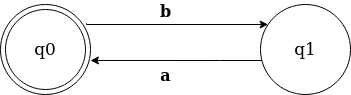

In [ ]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [ ]:
class RegexFSM:
    def __init__(self):
        self.start = self._create_start()
        self.q0 = self._create_q0()
        self.q1 = self._create_q1()
        
        self.current_state = self.start
        self.stopped = False
        
    def send(self, char):
        try:
            self.current_state.send(char)
        except StopIteration:
            self.stopped = True
        
    def does_match(self):
        if self.stopped:
            return False
        return self.current_state == self.q0

    @prime
    def _create_start(self):
        while True:
            char = yield
            if char == 'a':
                self.current_state = self.q1
            else:
                break
    
    @prime
    def _create_q1(self):
        while True:
            char = yield
            if char == 'b':
                self.current_state = self.q0
            else:
                break

    @prime
    def _create_q0(self):
        while True:
            char = yield
            if char == 'a':
                self.current_state = self.q1
            else:
                break

In [ ]:
def grep_regex(text):
    evaluator = RegexFSM()
    for ch in text:
        evaluator.send(ch)
    if evaluator.does_match() == True:
      print("ACCEPTED")
    else:
      print("NOT ACCEPTED")

In [ ]:
grep_regex("ab")

ACCEPTED


In [ ]:
grep_regex("abab")

ACCEPTED


# **5. String Kalimat**
L(G5) = { 01(ab)*10 ⎹ n > 0 } = { 01ab10, 01abab10, 01ababab10,...
}

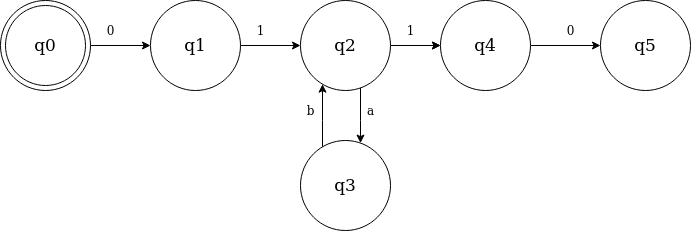

In [ ]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [ ]:
class RegexFSM:
    def __init__(self):
        self.start = self._create_start()
        self.q1 = self._create_q1()
        self.q2 = self._create_q2()
        self.q3 = self._create_q3()
        self.q4 = self._create_q4()
        self.q5 = self._create_q5()
        
        self.current_state = self.start
        self.stopped = False
        
    def send(self, char):
        try:
            self.current_state.send(char)
        except StopIteration:
            self.stopped = True
        
    def does_match(self):
        if self.stopped:
            return False
        return self.current_state == self.q5

    @prime
    def _create_start(self):
        while True:
            char = yield
            if char == '0':
                self.current_state = self.q1
            else:
                break
    
    @prime
    def _create_q1(self):
        while True:
            char = yield
            if char == '1':
                self.current_state = self.q2
            else:
                break

    @prime
    def _create_q2(self):
        while True:
            char = yield
            if char == 'a':
                self.current_state = self.q3
            elif char == '1':
                self.current_state = self.q4
            else:
                break

    @prime
    def _create_q3(self):
        while True:
            char = yield
            if char == 'b':
                self.current_state = self.q2
            else:
                break

    @prime
    def _create_q4(self):
        while True:
            char = yield
            if char == '0':
                self.current_state = self.q5
            else:
                break

    @prime
    def _create_q5(self):
        while True:
            char = yield
            break

In [ ]:
def grep_regex(text):
    evaluator = RegexFSM()
    for ch in text:
        evaluator.send(ch)
    if evaluator.does_match() == True:
      print("ACCEPTED")
    else:
      print("NOT ACCEPTED")

In [ ]:
grep_regex("01")

NOT ACCEPTED


In [ ]:
grep_regex("01ab10")

ACCEPTED


In [ ]:
grep_regex("01ababab10")

ACCEPTED


Sumber : [codementor](https://www.codementor.io/@arpitbhayani/building-finite-state-machines-with-python-coroutines-15nk03eh9l)